# **Kafka의 토픽이란?**

Topic(토픽) = 데이터를 구분하기위한 저장소로 최종적으로 데이터를 저장하고, 주고받을때 지정된 토픽으로 주고 받는다.

* 데이터가 들어갈 수 잇는 용량
* 토픽은 데이터베이스 테이블이나, 파일시스템의 폴더와 유사한 성질 
* 토픽의 프로듀서는 데이터를 삽입, 컨슈머가 데이터를 소비한다.
* 토픽은 목적에따라 각각의 이름을 가질 수 있고, 어떤 데이터를 담는지에 따라 명확하게 명명하는게 좋다

**토픽 내부 / 파티션**

메세지의 분류단위로 하나의 토픽에는 여러개의 파티션이 구성되어 있다.

파티션은 저장소안에 분리된 공간으로 스파크의 파티션이랑 비슷한 개념이라고 이해했고, kafak의 파티션이랑 spark의 streaming core와 매핑한다.

첫번째 파티션은 0번부터 시작해,각 파티션마다 고유한 offset(오프셋)을 갖고있다.

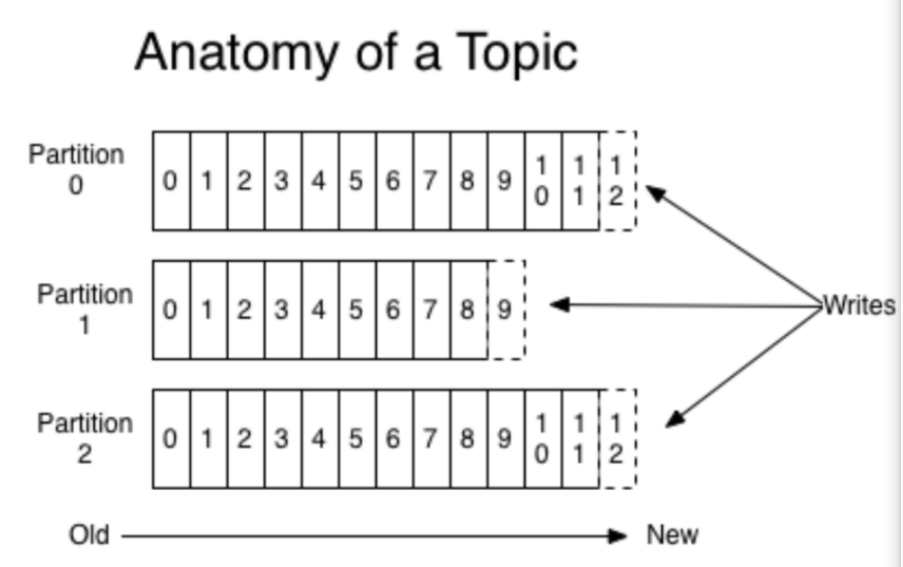

**파티션에 데이터 삽입**

* 큐처럼(FIFO) 내부에서 데이터가 파티션 끝에서부터 쌓임(프로듀서)
* (FIFO)데이터를 가장 오래된 순서대로 가져감(컨슈머)
* 데이터가 없으면 컨슈머는 데이터가 새로 들어올때까지 대기

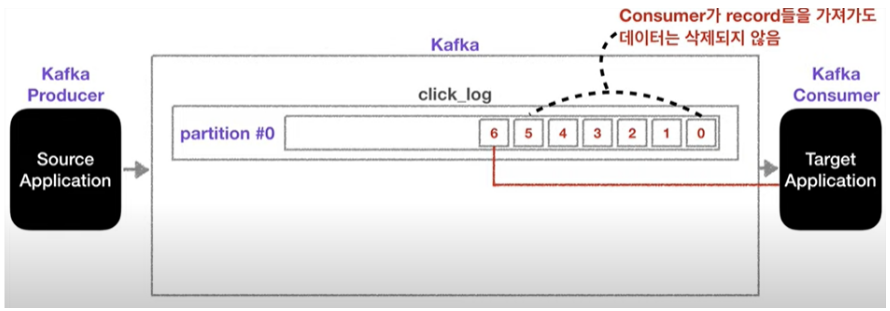

이때 컨슈머가 데이터를 가져가더 라도, 데이터는 삭제되지 않는다. 새로들어온 컨슈머와 기존 컨슈머 그룹이 다르고, AUTO.OFFSET.RESET=EARLISET일경우 파티션에 그대로 남은 데이터는 새로운 컨슈머가 붙었을때다시 0번부터 가져가면서 사용 할 수 있다.

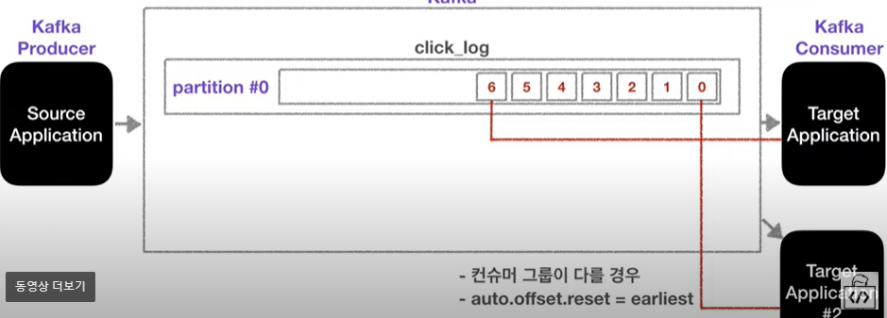

동일데이터를 목적에 따라 여러번 처리해서 다르게 사용하기 위해서


프로듀서가 데이터를 보낼때 어떤 파티션에 넣어야 하는가? - 데이터를 넣을 '키'를 지정 할 수 있다.

* 키를 지정하지 않고 기본 파티션을 사용할 경우 라운드로빈 방식으로 할당
* 키가있고, 기본파티션을 사용할 경우, 키의 해시값을 구하고 특정 파티션에 할당

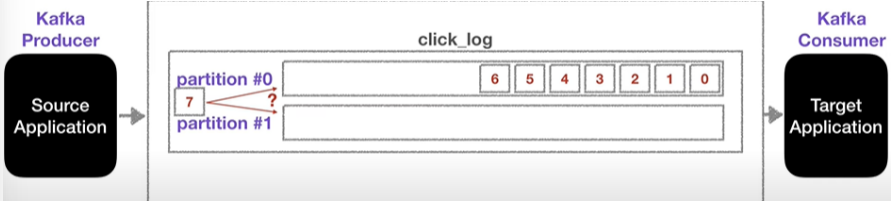